In [1]:
import pandas as pd
import numpy as np

In [2]:
%%markdown

# Read in initial data
# source: https://data.cityofchicago.org/Service-Requests/311-Service-Requests-Pot-Holes-Reported/7as2-ds3y

## parse dates


# Read in initial data

## parse dates

In [3]:
date_columns = ['CREATION DATE', 'COMPLETION DATE']

data = pd.read_csv('data/311_Service_Requests_-_Pot_Holes_Reported.csv', parse_dates=date_columns)

In [4]:
data.head()

,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,ZIP,X COORDINATE,Y COORDINATE,Ward,Police District,Community Area,SSA,LATITUDE,LONGITUDE,LOCATION
0,2011-01-01,Completed - Dup,2011-01-03,11-00002110,Pot Hole in Street,NaN,NaN,NaN,7600 S PARNELL AVE,60620.0,1.173863e+06,1.854506e+06,17.0,6.0,69.0,NaN,41.756078,-87.638540,"(41.75607825280598, -87.63853957634103)"
1,2011-01-01,Completed - Dup,2011-01-03,11-00002209,Pot Hole in Street,NaN,NaN,NaN,7100 S PULASKI RD,60629.0,1.150934e+06,1.857221e+06,13.0,8.0,65.0,3.0,41.764008,-87.722499,"(41.764007749308014, -87.72249910770661)"
2,2011-01-01,Completed - Dup,2011-01-03,11-00002224,Pot Hole in Street,NaN,NaN,NaN,2400 W FULLERTON AVE,60647.0,1.159964e+06,1.915885e+06,1.0,14.0,22.0,NaN,41.925010,-87.687705,"(41.92500993476519, -87.68770475222249)"
3,2011-01-01,Completed - Dup,2011-01-03,11-00002247,Pot Hole in Street,NaN,NaN,NaN,11100 S HALSTED ST,60628.0,1.172963e+06,1.831243e+06,34.0,22.0,75.0,45.0,41.692263,-87.642523,"(41.692263123425136, -87.6425226876268)"
4,2011-01-01,Completed - Dup,2011-01-03,11-00002276,Pot Hole in Street,NaN,NaN,NaN,1200 S CLARK ST,60605.0,1.175703e+06,1.895045e+06,2.0,1.0,33.0,NaN,41.867286,-87.630581,"(41.867286165270755, -87.63058096773683)"


In [11]:
## Add additional columns

data['COMPLETE'] = data['COMPLETION DATE'].notnull()
data['is_dupe'] = data['STATUS'].isin(['Completed - Dup', 'Open - Dup'])


In [12]:
data.head()

,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,ZIP,...,Y COORDINATE,Ward,Police District,Community Area,SSA,LATITUDE,LONGITUDE,LOCATION,COMPLETE,is_dupe
0,2011-01-01,Completed - Dup,2011-01-03,11-00002110,Pot Hole in Street,NaN,NaN,NaN,7600 S PARNELL AVE,60620.0,...,1.854506e+06,17.0,6.0,69.0,NaN,41.756078,-87.638540,"(41.75607825280598, -87.63853957634103)",True,True
1,2011-01-01,Completed - Dup,2011-01-03,11-00002209,Pot Hole in Street,NaN,NaN,NaN,7100 S PULASKI RD,60629.0,...,1.857221e+06,13.0,8.0,65.0,3.0,41.764008,-87.722499,"(41.764007749308014, -87.72249910770661)",True,True
2,2011-01-01,Completed - Dup,2011-01-03,11-00002224,Pot Hole in Street,NaN,NaN,NaN,2400 W FULLERTON AVE,60647.0,...,1.915885e+06,1.0,14.0,22.0,NaN,41.925010,-87.687705,"(41.92500993476519, -87.68770475222249)",True,True
3,2011-01-01,Completed - Dup,2011-01-03,11-00002247,Pot Hole in Street,NaN,NaN,NaN,11100 S HALSTED ST,60628.0,...,1.831243e+06,34.0,22.0,75.0,45.0,41.692263,-87.642523,"(41.692263123425136, -87.6425226876268)",True,True
4,2011-01-01,Completed - Dup,2011-01-03,11-00002276,Pot Hole in Street,NaN,NaN,NaN,1200 S CLARK ST,60605.0,...,1.895045e+06,2.0,1.0,33.0,NaN,41.867286,-87.630581,"(41.867286165270755, -87.63058096773683)",True,True


In [13]:
%%markdown

## Add time delta columns


## Add time delta columns

In [14]:
data.head()

,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,ZIP,...,Y COORDINATE,Ward,Police District,Community Area,SSA,LATITUDE,LONGITUDE,LOCATION,COMPLETE,is_dupe
0,2011-01-01,Completed - Dup,2011-01-03,11-00002110,Pot Hole in Street,NaN,NaN,NaN,7600 S PARNELL AVE,60620.0,...,1.854506e+06,17.0,6.0,69.0,NaN,41.756078,-87.638540,"(41.75607825280598, -87.63853957634103)",True,True
1,2011-01-01,Completed - Dup,2011-01-03,11-00002209,Pot Hole in Street,NaN,NaN,NaN,7100 S PULASKI RD,60629.0,...,1.857221e+06,13.0,8.0,65.0,3.0,41.764008,-87.722499,"(41.764007749308014, -87.72249910770661)",True,True
2,2011-01-01,Completed - Dup,2011-01-03,11-00002224,Pot Hole in Street,NaN,NaN,NaN,2400 W FULLERTON AVE,60647.0,...,1.915885e+06,1.0,14.0,22.0,NaN,41.925010,-87.687705,"(41.92500993476519, -87.68770475222249)",True,True
3,2011-01-01,Completed - Dup,2011-01-03,11-00002247,Pot Hole in Street,NaN,NaN,NaN,11100 S HALSTED ST,60628.0,...,1.831243e+06,34.0,22.0,75.0,45.0,41.692263,-87.642523,"(41.692263123425136, -87.6425226876268)",True,True
4,2011-01-01,Completed - Dup,2011-01-03,11-00002276,Pot Hole in Street,NaN,NaN,NaN,1200 S CLARK ST,60605.0,...,1.895045e+06,2.0,1.0,33.0,NaN,41.867286,-87.630581,"(41.867286165270755, -87.63058096773683)",True,True


In [37]:
data['WORK DURATION'] = data['COMPLETION DATE'] - data['CREATION DATE']
data['WAITING TIME'] = pd.to_datetime('today') - data['CREATION DATE']

In [17]:
data.head()

,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,ZIP,...,Ward,Police District,Community Area,SSA,LATITUDE,LONGITUDE,LOCATION,COMPLETE,is_dupe,WAITING TIME
0,2011-01-01,Completed - Dup,2011-01-03,11-00002110,Pot Hole in Street,NaN,NaN,NaN,7600 S PARNELL AVE,60620.0,...,17.0,6.0,69.0,NaN,41.756078,-87.638540,"(41.75607825280598, -87.63853957634103)",True,True,2656 days
1,2011-01-01,Completed - Dup,2011-01-03,11-00002209,Pot Hole in Street,NaN,NaN,NaN,7100 S PULASKI RD,60629.0,...,13.0,8.0,65.0,3.0,41.764008,-87.722499,"(41.764007749308014, -87.72249910770661)",True,True,2656 days
2,2011-01-01,Completed - Dup,2011-01-03,11-00002224,Pot Hole in Street,NaN,NaN,NaN,2400 W FULLERTON AVE,60647.0,...,1.0,14.0,22.0,NaN,41.925010,-87.687705,"(41.92500993476519, -87.68770475222249)",True,True,2656 days
3,2011-01-01,Completed - Dup,2011-01-03,11-00002247,Pot Hole in Street,NaN,NaN,NaN,11100 S HALSTED ST,60628.0,...,34.0,22.0,75.0,45.0,41.692263,-87.642523,"(41.692263123425136, -87.6425226876268)",True,True,2656 days
4,2011-01-01,Completed - Dup,2011-01-03,11-00002276,Pot Hole in Street,NaN,NaN,NaN,1200 S CLARK ST,60605.0,...,2.0,1.0,33.0,NaN,41.867286,-87.630581,"(41.867286165270755, -87.63058096773683)",True,True,2656 days


In [19]:
data['WAITING TIME'] = np.where(data['COMPLETE'] == True, pd.NaT, data['WAITING TIME'])

In [22]:
data['WAITING TIME'] = pd.to_timedelta(data['WAITING TIME'])
data['WORK DURATION'] = pd.to_timedelta(data['WAITING TIME'])

In [23]:
data.head()

,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,ZIP,...,Ward,Police District,Community Area,SSA,LATITUDE,LONGITUDE,LOCATION,COMPLETE,is_dupe,WAITING TIME
0,2011-01-01,Completed - Dup,2011-01-03,11-00002110,Pot Hole in Street,NaN,NaN,NaN,7600 S PARNELL AVE,60620.0,...,17.0,6.0,69.0,NaN,41.756078,-87.638540,"(41.75607825280598, -87.63853957634103)",True,True,NaT
1,2011-01-01,Completed - Dup,2011-01-03,11-00002209,Pot Hole in Street,NaN,NaN,NaN,7100 S PULASKI RD,60629.0,...,13.0,8.0,65.0,3.0,41.764008,-87.722499,"(41.764007749308014, -87.72249910770661)",True,True,NaT
2,2011-01-01,Completed - Dup,2011-01-03,11-00002224,Pot Hole in Street,NaN,NaN,NaN,2400 W FULLERTON AVE,60647.0,...,1.0,14.0,22.0,NaN,41.925010,-87.687705,"(41.92500993476519, -87.68770475222249)",True,True,NaT
3,2011-01-01,Completed - Dup,2011-01-03,11-00002247,Pot Hole in Street,NaN,NaN,NaN,11100 S HALSTED ST,60628.0,...,34.0,22.0,75.0,45.0,41.692263,-87.642523,"(41.692263123425136, -87.6425226876268)",True,True,NaT
4,2011-01-01,Completed - Dup,2011-01-03,11-00002276,Pot Hole in Street,NaN,NaN,NaN,1200 S CLARK ST,60605.0,...,2.0,1.0,33.0,NaN,41.867286,-87.630581,"(41.867286165270755, -87.63058096773683)",True,True,NaT


In [39]:
# remove duplicate requests

deduped = data[data['is_dupe'] == False]

In [40]:
deduped.head()

,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,ZIP,...,Police District,Community Area,SSA,LATITUDE,LONGITUDE,LOCATION,COMPLETE,is_dupe,WAITING TIME,WORK DURATION
9,2011-01-01,Completed,2011-01-03,11-00002021,Pot Hole in Street,Dispatch Crew,Pothole Patched,5.0,1642 W 99TH ST,60643.0,...,22.0,72.0,NaN,41.714035,-87.665096,"(41.71403466751051, -87.66509581640723)",True,False,2656 days,2 days
10,2011-01-01,Completed,2011-01-03,11-00002273,Pot Hole in Street,Dispatch Crew,Pothole Patched,7.0,3500 S PULASKI RD,60623.0,...,10.0,30.0,NaN,41.830224,-87.724352,"(41.830223541014355, -87.7243519544564)",True,False,2656 days,2 days
11,2011-01-01,Completed,2011-01-03,11-00002650,Pot Hole in Street,Dispatch Crew,Pothole Patched,5.0,7851 S DR MARTIN LUTHER KING JR DR,60619.0,...,6.0,69.0,51.0,41.751434,-87.614820,"(41.75143385051753, -87.61481960290558)",True,False,2656 days,2 days
12,2011-01-01,Completed,2011-01-03,11-00002654,Pot Hole in Street,Dispatch Crew,Pothole Patched,3.0,15 E 79TH ST,60619.0,...,6.0,44.0,NaN,41.750865,-87.623890,"(41.75086472111055, -87.62388985583482)",True,False,2656 days,2 days
13,2011-01-01,Completed,2011-01-03,11-00002656,Pot Hole in Street,Dispatch Crew,Pothole Patched,4.0,359 E 79TH ST,60619.0,...,6.0,44.0,51.0,41.750992,-87.615824,"(41.75099208108744, -87.61582439398472)",True,False,2656 days,2 days


In [41]:
deduped.describe()

,NUMBER OF POTHOLES FILLED ON BLOCK,ZIP,X COORDINATE,Y COORDINATE,Ward,Police District,Community Area,SSA,LATITUDE,LONGITUDE,WAITING TIME,WORK DURATION
count,369664.000000,371327.000000,3.725810e+05,3.725810e+05,372692.000000,372691.000000,372692.000000,58678.000000,372173.000000,372173.000000,372879,372153
mean,11.253768,60571.788680,1.160804e+06,1.889751e+06,24.895919,12.759466,36.432743,32.205341,41.852924,-87.685046,1420 days 20:28:06.273563,19 days 17:55:46.768667
std,18.211201,1902.687006,1.744252e+04,3.515222e+04,14.124101,6.998023,23.353029,17.583863,0.137055,0.212967,773 days 12:55:07.933761,33 days 09:23:03.955299
min,0.000000,0.000000,1.092430e+06,1.813892e+06,0.000000,0.000000,0.000000,1.000000,0.000000,-87.936132,2 days 00:00:00,0 days 00:00:00
25%,1.000000,60618.000000,1.149336e+06,1.859897e+06,13.000000,8.000000,16.000000,20.000000,41.771033,-87.727366,778 days 00:00:00,1 days 00:00:00
50%,5.000000,60630.000000,1.161527e+06,1.894414e+06,24.000000,12.000000,31.000000,33.000000,41.866041,-87.682863,1468 days 00:00:00,6 days 00:00:00
75%,14.000000,60643.000000,1.172913e+06,1.920100e+06,38.000000,18.000000,59.000000,47.000000,41.936871,-87.641526,2058 days 00:00:00,22 days 00:00:00
max,320.000000,60827.000000,1.205133e+06,1.951593e+06,50.000000,31.000000,77.000000,69.000000,42.022960,0.000000,3375 days 00:00:00,1194 days 00:00:00


In [42]:
## Let's plot some stuff

In [43]:
# wait time

# work duration

# distribution by area code

# wait time by area code

# work duration by area code

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [46]:
def get_days(x):
    if type(x) == type(pd.NaT):
        return 0
    return x.days

In [47]:
deduped['WAITING DAYS'] = deduped['WAITING TIME'].apply(get_days)
deduped['WORK DAYS'] = deduped['WORK DURATION'].apply(get_days)

/home/steven/.virtualenvs/data-science/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/steven/.virtualenvs/data-science/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [49]:
deduped.head()

,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,ZIP,...,SSA,LATITUDE,LONGITUDE,LOCATION,COMPLETE,is_dupe,WAITING TIME,WORK DURATION,WAITING DAYS,WORK DAYS
9,2011-01-01,Completed,2011-01-03,11-00002021,Pot Hole in Street,Dispatch Crew,Pothole Patched,5.0,1642 W 99TH ST,60643.0,...,NaN,41.714035,-87.665096,"(41.71403466751051, -87.66509581640723)",True,False,2656 days,2 days,2656,2
10,2011-01-01,Completed,2011-01-03,11-00002273,Pot Hole in Street,Dispatch Crew,Pothole Patched,7.0,3500 S PULASKI RD,60623.0,...,NaN,41.830224,-87.724352,"(41.830223541014355, -87.7243519544564)",True,False,2656 days,2 days,2656,2
11,2011-01-01,Completed,2011-01-03,11-00002650,Pot Hole in Street,Dispatch Crew,Pothole Patched,5.0,7851 S DR MARTIN LUTHER KING JR DR,60619.0,...,51.0,41.751434,-87.614820,"(41.75143385051753, -87.61481960290558)",True,False,2656 days,2 days,2656,2
12,2011-01-01,Completed,2011-01-03,11-00002654,Pot Hole in Street,Dispatch Crew,Pothole Patched,3.0,15 E 79TH ST,60619.0,...,NaN,41.750865,-87.623890,"(41.75086472111055, -87.62388985583482)",True,False,2656 days,2 days,2656,2
13,2011-01-01,Completed,2011-01-03,11-00002656,Pot Hole in Street,Dispatch Crew,Pothole Patched,4.0,359 E 79TH ST,60619.0,...,51.0,41.750992,-87.615824,"(41.75099208108744, -87.61582439398472)",True,False,2656 days,2 days,2656,2


In [55]:
deduped['WORK_DAYS'] = deduped['WORK DAYS']
deduped['mra'] = deduped['MOST RECENT ACTION']

deduped.query("COMPLETE == True and WORK_DAYS > 50")

/home/steven/.virtualenvs/data-science/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/steven/.virtualenvs/data-science/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,ZIP,...,LONGITUDE,LOCATION,COMPLETE,is_dupe,WAITING TIME,WORK DURATION,WAITING DAYS,WORK DAYS,WORK_DAYS,mra
713,2011-01-03,Completed,2011-02-23,11-00005247,Pot Hole in Street,Dispatch Crew,Pothole Patched,39.0,7199 N OAKLEY AVE,60645.0,...,-87.688019,"(42.01219913703694, -87.68801943579926)",True,False,2654 days,51 days,2654,51,51,Pothole Patched
2805,2011-01-06,Completed,2011-06-02,11-00026374,Pot Hole in Street,Dispatch Crew,Pothole Patched,NaN,3948 N OKETO AVE,60634.0,...,-87.812368,"(41.952011695214054, -87.81236781183173)",True,False,2651 days,147 days,2651,147,147,Pothole Patched
3604,2012-01-08,Completed,2012-07-03,12-00032815,Pot Hole in Street,Dispatch Crew,No Problem Found,NaN,1900 W 33RD PL,60608.0,...,NaN,NaN,True,False,2284 days,177 days,2284,177,177,No Problem Found
5937,2012-01-11,Completed,2012-03-13,12-00050436,Pot Hole in Street,Dispatch Crew,Completed,NaN,7000 W FOREST PRESERVE AVE,0.0,...,-87.801502,"(41.95675769433997, -87.80150226513415)",True,False,2281 days,62 days,2281,62,62,Completed
6211,2009-01-12,Completed,2011-10-06,09-00061329,Pot Hole in Street,Dispatch Crew,Pothole Patched,33.0,2519 S HALSTED ST,60608.0,...,-87.646321,"(41.84645996932382, -87.64632066769741)",True,False,3375 days,997 days,3375,997,997,Pothole Patched
11289,2012-01-23,Completed,2012-04-11,12-00097410,Pot Hole in Street,Dispatch Crew,NaN,NaN,424 S AUSTIN BLVD,NaN,...,-87.774594,"(41.87404777133902, -87.7745940746947)",True,False,2269 days,79 days,2269,79,79,NaN
11690,2011-01-24,Completed,2011-04-04,11-00111826,Pot Hole in Street,Dispatch Crew,Pothole Patched,2.0,5837 S ARCHER AVE,60638.0,...,-87.760072,"(41.79595856748336, -87.76007185929173)",True,False,2633 days,70 days,2633,70,70,Pothole Patched
13510,2011-01-26,Completed,2011-04-07,11-00128214,Pot Hole in Street,Dispatch Crew,Pothole Patched,15.0,3800 W ACCESS ST,60623.0,...,-87.719355,"(41.83292488872132, -87.71935462461963)",True,False,2631 days,71 days,2631,71,71,Pothole Patched
14106,2011-01-27,Completed,2011-05-06,11-00135944,Pot Hole in Street,Dispatch Crew,Pothole Patched,5.0,3436 N OSCEOLA AVE,60634.0,...,-87.813168,"(41.94254335048102, -87.81316800251847)",True,False,2630 days,99 days,2630,99,99,Pothole Patched
14545,2011-01-28,Completed,2011-04-07,11-00139482,Pot Hole in Street,Dispatch Crew,Pothole Patched,8.0,1300 W BALMORAL AVE,60640.0,...,-87.662512,"(41.980043028017356, -87.66251241729341)",True,False,2629 days,69 days,2629,69,69,Pothole Patched


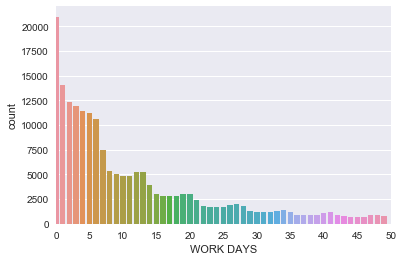

In [57]:
ax = sns.countplot(deduped.query('COMPLETE == True and WORK_DAYS <= 50 and WORK_DAYS > 0 and mra == "Pothole Patched"')['WORK DAYS'], 
                  )
ax.set_xlim(0, 50);
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
ax.xaxis.set_major_formatter(plt.ScalarFormatter());

In [137]:
mean_by_zip = deduped[deduped['COMPLETE'] == True].groupby('ZIP')[['WORK DAYS']].mean()

In [158]:
count_by_zip = deduped[deduped['COMPLETE'] == True].groupby('ZIP').size()

In [138]:
type(mean_by_zip)

pandas.core.frame.DataFrame

In [139]:
mean_by_zip.head()

,WORK DAYS
ZIP,
0.0,30.375342
60601.0,12.482353
60602.0,8.982014
60603.0,10.645314
60604.0,9.094915


In [143]:
mean_by_zip.index = mean_by_zip.index.astype('int')

In [144]:
# drop "0" area code
mean_by_zip = mean_by_zip.drop(0)

In [145]:
mean_by_zip.head()

,WORK DAYS
ZIP,
60601,12.482353
60602,8.982014
60603,10.645314
60604,9.094915
60605,15.817487


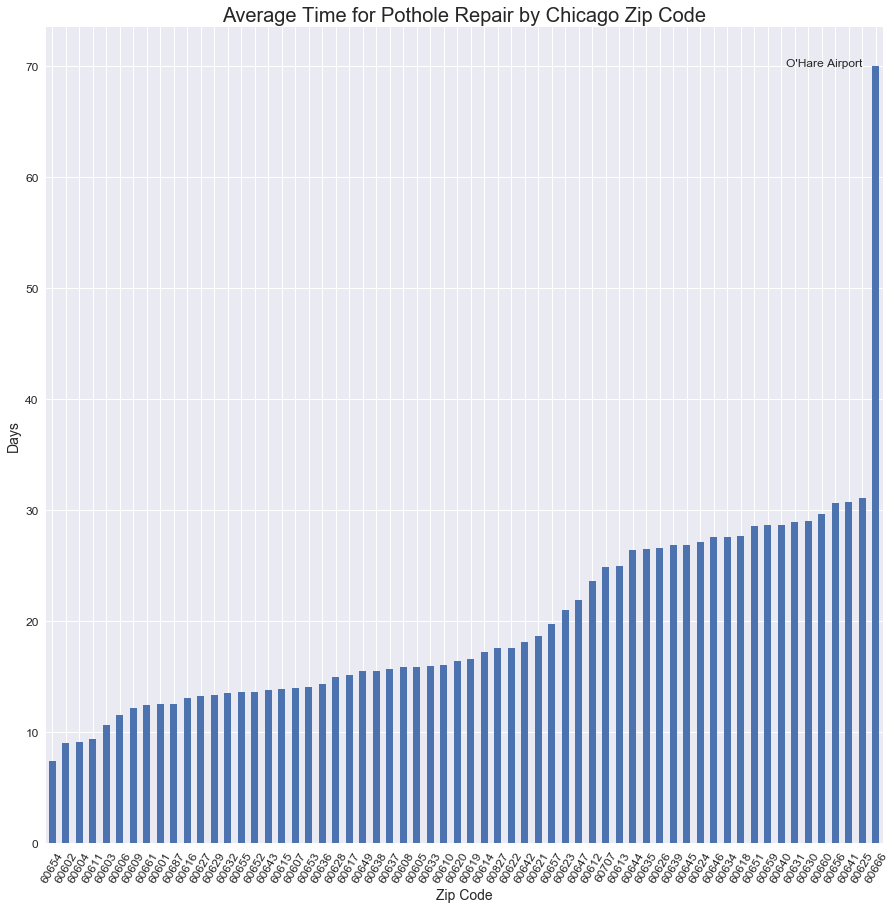

In [583]:
ax = mean_by_zip.sort_values('WORK DAYS').plot(sort_columns=True, kind='bar', figsize=(15, 15))

ax.text(60, 70, "O'Hare Airport", ha='right', transform=ax.transData);
ax.legend_.remove()
ax.tick_params(labelsize=12);
ax.set_xlabel('Zip Code', fontsize=14);
ax.set_ylabel('Days', fontsize=14)
plt.xticks(rotation=60)
ax.set_title('Average Time for Pothole Repair by Chicago Zip Code', fontsize=20);

In [571]:
ax.set_xlabel?

In [362]:
## load income data
# source https://www.irs.gov/statistics/soi-tax-stats-individual-income-tax-statistics-2015-zip-code-data-soi
income = pd.read_csv('data/15zpallagi.csv', usecols=['zipcode', 'N1', 'N02650', 'A02650', 'A01000', 'N01000'])

In [363]:
income.head(20)

,zipcode,N1,N02650,A02650,N01000,A01000
0,0,836320.0,836310.0,11036309.0,35620.0,34276.0
1,0,494830.0,494830.0,17960153.0,31610.0,66922.0
2,0,261250.0,261250.0,16216787.0,32230.0,100439.0
3,0,166690.0,166690.0,14588959.0,27830.0,126599.0
4,0,212660.0,212670.0,28985528.0,59400.0,513050.0
5,0,55360.0,55360.0,25509193.0,32020.0,2485448.0
6,35004,1490.0,1490.0,19279.0,50.0,10.0
7,35004,1350.0,1350.0,50786.0,80.0,67.0
8,35004,970.0,970.0,60315.0,70.0,144.0
9,35004,620.0,620.0,54301.0,80.0,295.0


In [364]:
income.rename(columns={'A02650': 'total_income_amount', 
                       'N02650': 'num_with_income', 
                       'N1': 'num_of_returns',
                       'A01000': 'total_capital_gains',
                       'N01000': 'num_with_capital_gains'}, inplace=True)
income

,zipcode,num_of_returns,num_with_income,total_income_amount,num_with_capital_gains,total_capital_gains
0,0,836320.0,836310.0,11036309.0,35620.0,34276.0
1,0,494830.0,494830.0,17960153.0,31610.0,66922.0
2,0,261250.0,261250.0,16216787.0,32230.0,100439.0
3,0,166690.0,166690.0,14588959.0,27830.0,126599.0
4,0,212660.0,212670.0,28985528.0,59400.0,513050.0
5,0,55360.0,55360.0,25509193.0,32020.0,2485448.0
6,35004,1490.0,1490.0,19279.0,50.0,10.0
7,35004,1350.0,1350.0,50786.0,80.0,67.0
8,35004,970.0,970.0,60315.0,70.0,144.0
9,35004,620.0,620.0,54301.0,80.0,295.0


In [207]:
"{}% have income".format(income['num_with_income'].sum()/ income['num_of_returns'].sum() * 100)

'99.99985369629174% have income'

In [365]:
income_by_zipcode = income.groupby('zipcode')[['num_with_income', 'total_income_amount', 
                                               'num_with_capital_gains', 'total_capital_gains']].sum()
income_by_zipcode.head()

,num_with_income,total_income_amount,num_with_capital_gains,total_capital_gains
zipcode,,,,
0,146918030.0,1.034457e+10,23402940.0,570865955.0
1001,8950.0,5.047740e+05,1260.0,6717.0
1002,9670.0,7.964750e+05,2950.0,57274.0
1005,2300.0,1.383090e+05,330.0,2124.0
1007,7490.0,5.375090e+05,1300.0,10447.0


In [366]:
income_by_zipcode['avg_income'] = income_by_zipcode['total_income_amount'] * 1000 / income_by_zipcode['num_with_income']
income_by_zipcode['avg_capital_gains'] = income_by_zipcode['total_capital_gains'] * 1000 / income_by_zipcode['num_with_capital_gains']
income_by_zipcode['avg_income'] = income_by_zipcode['avg_income'].astype(int)
income_by_zipcode.head()

,num_with_income,total_income_amount,num_with_capital_gains,total_capital_gains,avg_income,avg_capital_gains
zipcode,,,,,,
0,146918030.0,1.034457e+10,23402940.0,570865955.0,70410,24392.916232
1001,8950.0,5.047740e+05,1260.0,6717.0,56399,5330.952381
1002,9670.0,7.964750e+05,2950.0,57274.0,82365,19414.915254
1005,2300.0,1.383090e+05,330.0,2124.0,60134,6436.363636
1007,7490.0,5.375090e+05,1300.0,10447.0,71763,8036.153846


In [367]:
income_by_zipcode.loc[income_by_zipcode['avg_income'].idxmax()]

num_with_income               220.00
total_income_amount        561790.00
num_with_capital_gains        160.00
total_capital_gains        186977.00
avg_income                2553590.00
avg_capital_gains         1168606.25
Name: 33109, dtype: float64

In [368]:
income_by_zipcode.sort_values('avg_income', ascending=False)

,num_with_income,total_income_amount,num_with_capital_gains,total_capital_gains,avg_income,avg_capital_gains
zipcode,,,,,,
33109,220.0,561790.0,160.0,186977.0,2553590,1.168606e+06
94027,3250.0,4904269.0,2340.0,2046659.0,1509005,8.746406e+05
33480,5490.0,6938322.0,3680.0,3577217.0,1263810,9.720698e+05
94301,8760.0,10344979.0,5300.0,4326312.0,1180933,8.162853e+05
94104,1310.0,1301904.0,560.0,404880.0,993819,7.230000e+05
10577,1610.0,1585609.0,980.0,373087.0,984850,3.807010e+05
19035,2020.0,1951274.0,1390.0,249193.0,965977,1.792755e+05
90067,3280.0,3007211.0,2020.0,743083.0,916832,3.678629e+05
60043,1220.0,1061793.0,850.0,202511.0,870322,2.382482e+05


In [377]:
income_by_zipcode.sort_values('avg_capital_gains', ascending=False)

,num_with_income,total_income_amount,num_with_capital_gains,total_capital_gains,avg_income,avg_capital_gains
zipcode,,,,,,
7102,4400.0,781441.0,230.0,486407.0,177600,2.114813e+06
33109,220.0,561790.0,160.0,186977.0,2553590,1.168606e+06
33480,5490.0,6938322.0,3680.0,3577217.0,1263810,9.720698e+05
76102,4270.0,1466387.0,1090.0,995237.0,343416,9.130615e+05
94027,3250.0,4904269.0,2340.0,2046659.0,1509005,8.746406e+05
83014,1650.0,1163704.0,830.0,704652.0,705275,8.489783e+05
94301,8760.0,10344979.0,5300.0,4326312.0,1180933,8.162853e+05
23219,2230.0,423980.0,350.0,277331.0,190125,7.923743e+05
60604,620.0,349923.0,260.0,194197.0,564391,7.469115e+05


In [381]:
# % with more capital gains than income

more_capital_gains = income_by_zipcode[income_by_zipcode['avg_capital_gains'] > income_by_zipcode['avg_income']]

"{}% have higher capital gains".format(more_capital_gains.shape[0] * 100 / income_by_zipcode.shape[0])

'0.3395585738539898% have higher capital gains'

In [369]:
income_by_zipcode.loc[94122]

num_with_income           3.258000e+04
total_income_amount       2.992086e+06
num_with_capital_gains    9.170000e+03
total_capital_gains       1.797540e+05
avg_income                9.183800e+04
avg_capital_gains         1.960240e+04
Name: 94122, dtype: float64

In [370]:
income_by_zipcode.loc[92024]

num_with_income           2.509000e+04
total_income_amount       3.648563e+06
num_with_capital_gains    9.210000e+03
total_capital_gains       4.236700e+05
avg_income                1.454190e+05
avg_capital_gains         4.600109e+04
Name: 92024, dtype: float64

In [371]:
income_by_zipcode.loc[91942]

num_with_income           1.969000e+04
total_income_amount       1.141662e+06
num_with_capital_gains    2.900000e+03
total_capital_gains       1.840000e+04
avg_income                5.798100e+04
avg_capital_gains         6.344828e+03
Name: 91942, dtype: float64

In [372]:
income_by_zipcode.loc[11220]

num_with_income           5.427000e+04
total_income_amount       1.561786e+06
num_with_capital_gains    2.740000e+03
total_capital_gains       1.992400e+04
avg_income                2.877800e+04
avg_capital_gains         7.271533e+03
Name: 11220, dtype: float64

In [373]:
income_by_zipcode.loc[11226]

num_with_income           5.227000e+04
total_income_amount       2.035925e+06
num_with_capital_gains    2.640000e+03
total_capital_gains       3.084500e+04
avg_income                3.895000e+04
avg_capital_gains         1.168371e+04
Name: 11226, dtype: float64

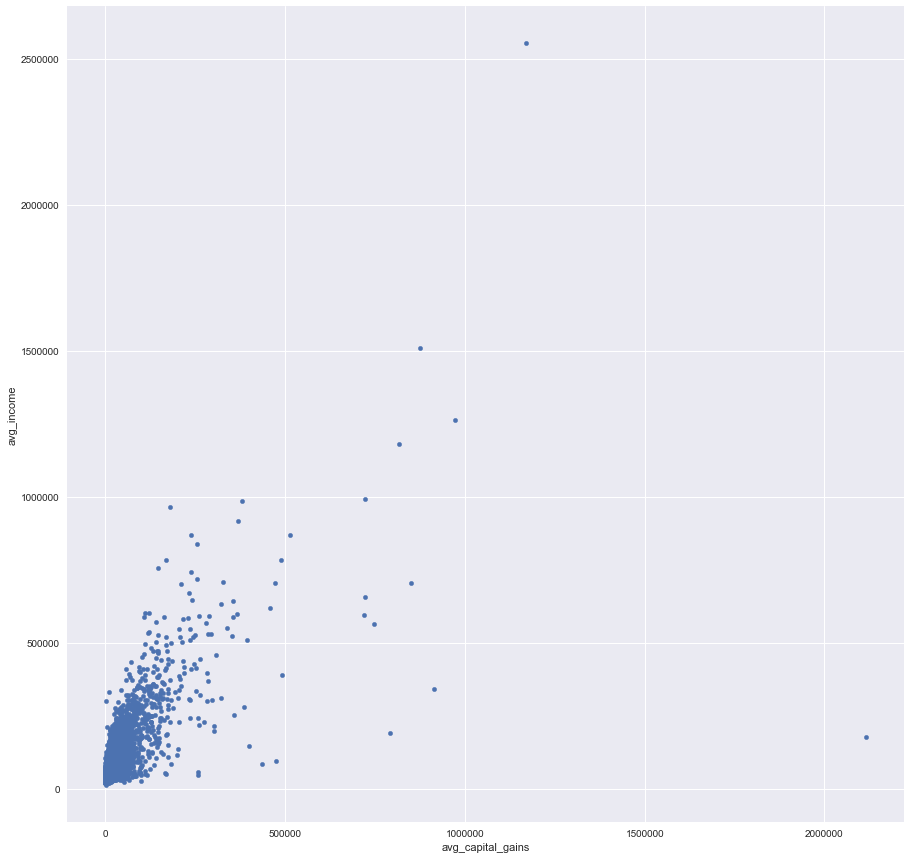

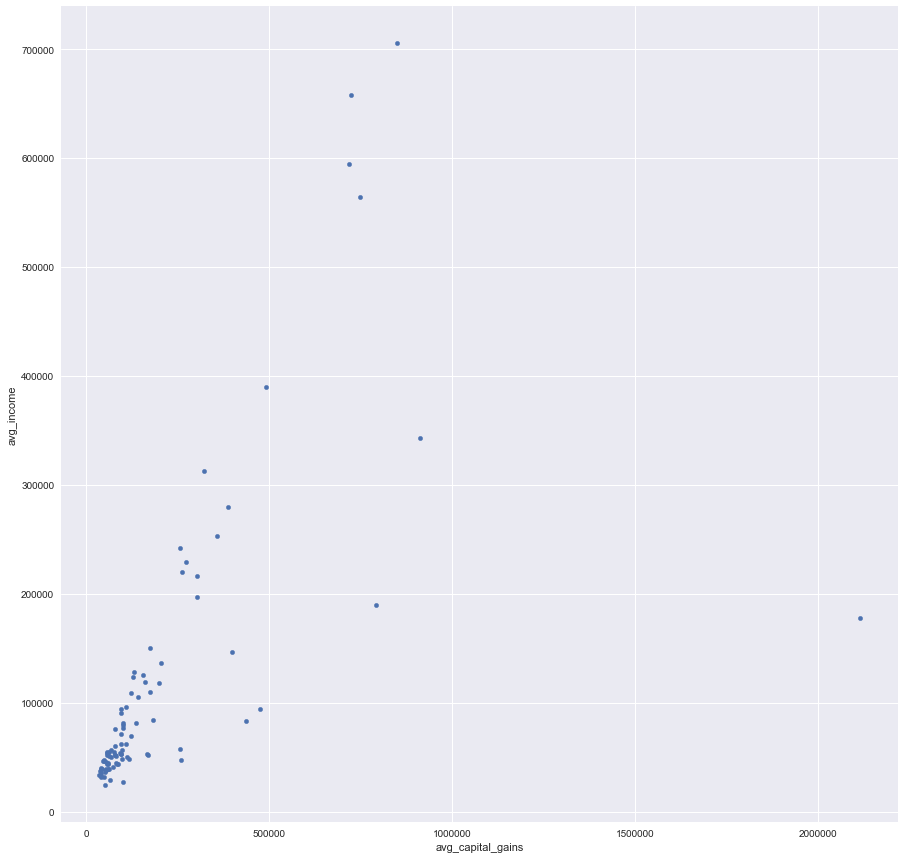

In [382]:
# capital gains vs income

income_by_zipcode.plot('avg_capital_gains', 'avg_income', 'scatter', figsize=(15, 15));
more_capital_gains.plot('avg_capital_gains', 'avg_income', 'scatter', figsize=(15, 15));

In [235]:
## join by zipcode to pothole dataset

In [265]:
mean_by_zip.head()

,WORK DAYS
ZIP,
60601,12.482353
60602,8.982014
60603,10.645314
60604,9.094915
60605,15.817487


In [266]:
income_by_zipcode.head()

,num_with_income,total_income_amount,avg_income
zipcode,,,
0,146918030.0,1.034457e+10,70410.473459
1001,8950.0,5.047740e+05,56399.329609
1002,9670.0,7.964750e+05,82365.563599
1005,2300.0,1.383090e+05,60134.347826
1007,7490.0,5.375090e+05,71763.551402


In [272]:
work_joined = pd.merge(mean_by_zip, income_by_zipcode, left_index=True, right_index=True)

In [273]:
work_joined.head()

,WORK DAYS,num_with_income,total_income_amount,avg_income
60601,12.482353,7560.0,1664704.0,220198.941799
60602,8.982014,1270.0,408783.0,321876.377953
60603,10.645314,1400.0,651778.0,465555.714286
60604,9.094915,620.0,349923.0,564391.935484
60605,15.817487,13420.0,1802855.0,134340.909091


In [276]:
work_joined.shape

(58, 4)

In [292]:
work_joined.sort_values('avg_income', ascending=False)

,WORK DAYS,num_with_income,total_income_amount,avg_income
60604,9.094915,620.0,349923.0,564391.935484
60603,10.645314,1400.0,651778.0,465555.714286
60611,9.352253,19300.0,8038373.0,416496.010363
60602,8.982014,1270.0,408783.0,321876.377953
60606,11.517361,2520.0,786865.0,312248.015873
60601,12.482353,7560.0,1664704.0,220198.941799
60614,17.157487,36730.0,7920337.0,215636.727471
60654,7.370934,11800.0,2338773.0,198201.101695
60610,16.035378,22890.0,3805165.0,166237.003058
60661,12.369060,6780.0,994123.0,146625.811209


In [359]:
import matplotlib
matplotlib.style.available

['seaborn-dark-palette',
 'seaborn-pastel',
 'grayscale',
 '_classic_test',
 'seaborn-poster',
 'seaborn',
 'seaborn-ticks',
 'bmh',
 'seaborn-colorblind',
 'seaborn-notebook',
 'seaborn-muted',
 'seaborn-dark',
 'dark_background',
 'fast',
 'classic',
 'ggplot',
 'seaborn-white',
 'seaborn-deep',
 'seaborn-darkgrid',
 'seaborn-whitegrid',
 'seaborn-bright',
 'seaborn-talk',
 'Solarize_Light2',
 'fivethirtyeight',
 'seaborn-paper',
 'tableau-colorblind10']

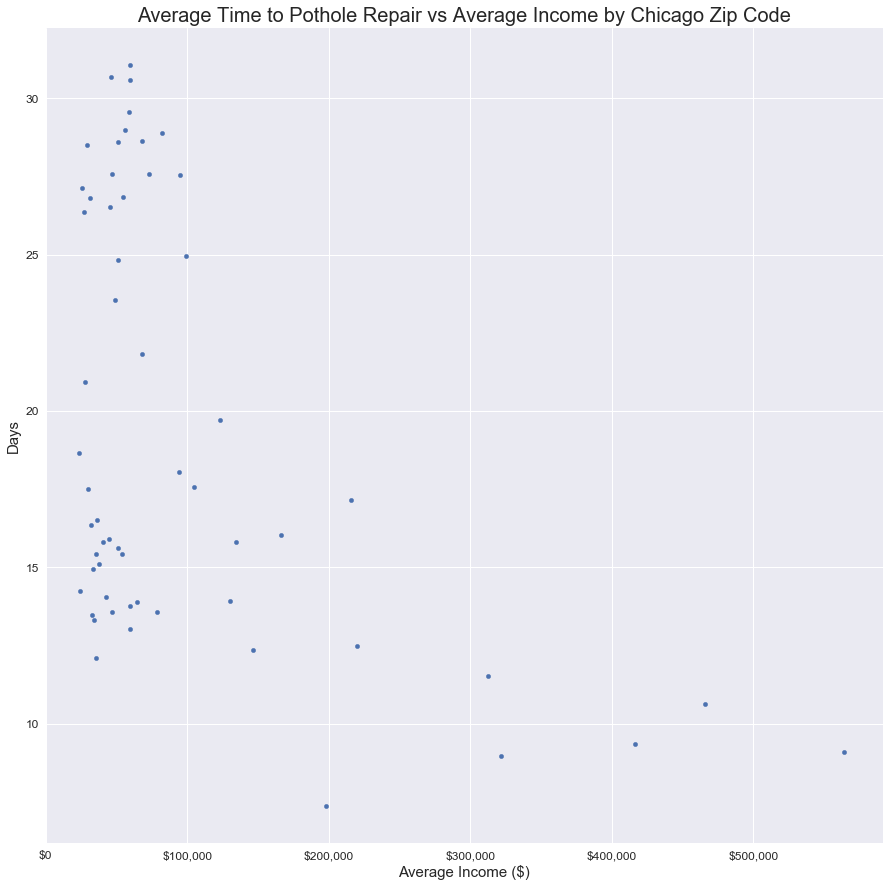

In [729]:
# with plt.style.context('dark_background'):
#     work_joined.plot('avg_income', 'WORK DAYS', 'scatter', figsize=(10,10));

sns.set()
ax = work_joined.plot('avg_income', 'WORK DAYS', 'scatter', figsize=(15,15));
ax.set_title('Average Time to Pothole Repair vs Average Income by Chicago Zip Code', fontsize=20)
ax.set_xlabel('Average Income ($)', fontsize=15)
ax.set_ylabel('Days', fontsize=15)
ax.tick_params(labelsize=12);
ax.set_xlim(left=0);
ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: '$' + format(int(x), ',')));

In [294]:
# get days requests sit open
deduped.head()

,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,ZIP,...,LONGITUDE,LOCATION,COMPLETE,is_dupe,WAITING TIME,WORK DURATION,WAITING DAYS,WORK DAYS,WORK_DAYS,mra
9,2011-01-01,Completed,2011-01-03,11-00002021,Pot Hole in Street,Dispatch Crew,Pothole Patched,5.0,1642 W 99TH ST,60643.0,...,-87.665096,"(41.71403466751051, -87.66509581640723)",True,False,2656 days,2 days,2656,2,2,Pothole Patched
10,2011-01-01,Completed,2011-01-03,11-00002273,Pot Hole in Street,Dispatch Crew,Pothole Patched,7.0,3500 S PULASKI RD,60623.0,...,-87.724352,"(41.830223541014355, -87.7243519544564)",True,False,2656 days,2 days,2656,2,2,Pothole Patched
11,2011-01-01,Completed,2011-01-03,11-00002650,Pot Hole in Street,Dispatch Crew,Pothole Patched,5.0,7851 S DR MARTIN LUTHER KING JR DR,60619.0,...,-87.614820,"(41.75143385051753, -87.61481960290558)",True,False,2656 days,2 days,2656,2,2,Pothole Patched
12,2011-01-01,Completed,2011-01-03,11-00002654,Pot Hole in Street,Dispatch Crew,Pothole Patched,3.0,15 E 79TH ST,60619.0,...,-87.623890,"(41.75086472111055, -87.62388985583482)",True,False,2656 days,2 days,2656,2,2,Pothole Patched
13,2011-01-01,Completed,2011-01-03,11-00002656,Pot Hole in Street,Dispatch Crew,Pothole Patched,4.0,359 E 79TH ST,60619.0,...,-87.615824,"(41.75099208108744, -87.61582439398472)",True,False,2656 days,2 days,2656,2,2,Pothole Patched


In [301]:
open_requests = deduped[(deduped['COMPLETE'] == False) & (deduped['STATUS'] == 'Open')]

In [314]:
open_requests = open_requests[['ZIP', 'WAITING DAYS']]

In [315]:
aggregated_open_requests = open_requests.groupby('ZIP').agg(['mean', 'count']).drop(0)

In [318]:
aggregated_open_requests.index = aggregated_open_requests.index.astype(int)

In [319]:
aggregated_open_requests.head()

WAITING DAYS      
              mean count
ZIP                     
60601     5.000000     1
60604     2.000000     1
60605     2.500000     2
60607    11.666667    12
60608    11.555556    27

In [353]:
aggregated_open_requests.sort_values(by=[('WAITING DAYS', 'mean')], ascending=False)

WAITING DAYS      
              mean count
ZIP                     
60640    99.222222    18
60613    70.125000     8
60657    27.666667     6
60624    21.954545    22
60666    21.000000     1
60612    20.820513    39
60623    17.085714    35
60651    16.950000    20
60618    16.344828    29
60628    16.272727    22
60644    14.391304    23
60639    14.028571    35
60647    13.363636    11
60630    11.772727    22
60607    11.666667    12
60608    11.555556    27
60619    11.400000    25
60617    11.380952    42
60625    11.181818    11
60614    10.833333     6
60634    10.136364    22
60641    10.076923    26
60620     9.588235    17
60622     9.500000    12
60707     9.200000    10
60652     8.833333     6
60615     8.300000    10
60633     8.285714     7
60643     7.428571    14
60610     6.750000     4
60637     6.083333    12
60656     5.888889     9
60638     5.500000     6
60642     5.400000    10
60649     5.111111     9
60646     5.000000    10
60601     5.000000     1
60631     4.906977    43
60827     4.666667     3
60616     4.500000     2
60654     4.500000     2
60659     4.250000     4
60611     4.166667     6
60632     4.058824    17
60645     4.000000     4
60661     4.000000     1
60636     4.000000     3
60655     3.833333     6
60621     3.800000     5
60626     3.666667     3
60609     3.666667     3
60653     3.500000     2
60629     3.000000     2
60660     3.000000     7
60605     2.500000     2
60604     2.000000     1

In [334]:
aggregated_open_requests_plot = open_requests.groupby('ZIP').mean().drop(0)

In [335]:
joined_open = pd.merge(aggregated_open_requests_plot, income_by_zipcode, left_index=True, right_index=True)

In [336]:
joined_open.head()

,WAITING DAYS,num_with_income,total_income_amount,avg_income
60601,5.000000,7560.0,1664704.0,220198
60604,2.000000,620.0,349923.0,564391
60605,2.500000,13420.0,1802855.0,134340
60607,11.666667,13240.0,1722638.0,130108
60608,11.555556,30830.0,1249844.0,40539


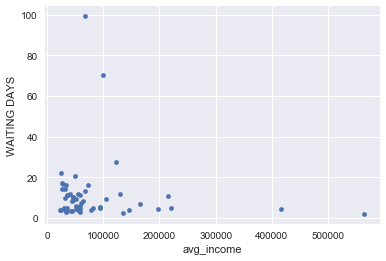

In [338]:
joined_open.plot('avg_income', 'WAITING DAYS', 'scatter');

In [383]:
# overlap in top 1% income and top 1% capital gains

In [385]:
income_by_zipcode.drop(0)

,num_with_income,total_income_amount,num_with_capital_gains,total_capital_gains,avg_income,avg_capital_gains
zipcode,,,,,,
1001,8950.0,504774.0,1260.0,6717.0,56399,5330.952381
1002,9670.0,796475.0,2950.0,57274.0,82365,19414.915254
1005,2300.0,138309.0,330.0,2124.0,60134,6436.363636
1007,7490.0,537509.0,1300.0,10447.0,71763,8036.153846
1008,620.0,40213.0,90.0,328.0,64859,3644.444444


In [388]:
one_perc_count = round(income_by_zipcode.shape[0] * .01)

In [389]:
one_perc_count

277

In [390]:
income_by_zipcode.shape[0]

27683

In [395]:
top_income = income_by_zipcode.sort_values('avg_income', ascending=False).iloc[:one_perc_count]

In [396]:
top_income.head()

,num_with_income,total_income_amount,num_with_capital_gains,total_capital_gains,avg_income,avg_capital_gains
zipcode,,,,,,
33109,220.0,561790.0,160.0,186977.0,2553590,1.168606e+06
94027,3250.0,4904269.0,2340.0,2046659.0,1509005,8.746406e+05
33480,5490.0,6938322.0,3680.0,3577217.0,1263810,9.720698e+05
94301,8760.0,10344979.0,5300.0,4326312.0,1180933,8.162853e+05
94104,1310.0,1301904.0,560.0,404880.0,993819,7.230000e+05


In [397]:
top_cap_gains = income_by_zipcode.sort_values('avg_capital_gains', ascending=False).iloc[:one_perc_count]

In [398]:
top_cap_gains.head()

,num_with_income,total_income_amount,num_with_capital_gains,total_capital_gains,avg_income,avg_capital_gains
zipcode,,,,,,
7102,4400.0,781441.0,230.0,486407.0,177600,2.114813e+06
33109,220.0,561790.0,160.0,186977.0,2553590,1.168606e+06
33480,5490.0,6938322.0,3680.0,3577217.0,1263810,9.720698e+05
76102,4270.0,1466387.0,1090.0,995237.0,343416,9.130615e+05
94027,3250.0,4904269.0,2340.0,2046659.0,1509005,8.746406e+05


In [403]:
top_both = pd.merge(top_cap_gains, top_income, left_index=True, right_index=True)

In [404]:
top_both.head()

,num_with_income_x,total_income_amount_x,num_with_capital_gains_x,total_capital_gains_x,avg_income_x,avg_capital_gains_x,num_with_income_y,total_income_amount_y,num_with_capital_gains_y,total_capital_gains_y,avg_income_y,avg_capital_gains_y
zipcode,,,,,,,,,,,,
33109,220.0,561790.0,160.0,186977.0,2553590,1.168606e+06,220.0,561790.0,160.0,186977.0,2553590,1.168606e+06
33480,5490.0,6938322.0,3680.0,3577217.0,1263810,9.720698e+05,5490.0,6938322.0,3680.0,3577217.0,1263810,9.720698e+05
76102,4270.0,1466387.0,1090.0,995237.0,343416,9.130615e+05,4270.0,1466387.0,1090.0,995237.0,343416,9.130615e+05
94027,3250.0,4904269.0,2340.0,2046659.0,1509005,8.746406e+05,3250.0,4904269.0,2340.0,2046659.0,1509005,8.746406e+05
83014,1650.0,1163704.0,830.0,704652.0,705275,8.489783e+05,1650.0,1163704.0,830.0,704652.0,705275,8.489783e+05


In [408]:
top_both.index.values

array([ 1773,  2030,  2090,  2108,  2109,  2110,  2116,  2199,  2421,
        2445,  2465,  2467,  2481,  2482,  2493,  6820,  6830,  6831,
        6840,  6870,  6878,  6880,  7078,  7417,  7627,  7760,  7931,
        7976, 10003, 10004, 10005, 10007, 10011, 10012, 10013, 10014,
       10017, 10018, 10019, 10021, 10022, 10023, 10024, 10028, 10065,
       10069, 10075, 10128, 10282, 10504, 10528, 10538, 10577, 10580,
       10583, 10708, 11024, 11545, 11560, 11568, 11733, 11765, 11771,
       11976, 13152, 15142, 19035, 19041, 19066, 19085, 20007, 20184,
       22101, 22102, 28207, 29401, 29482, 30305, 30327, 31561, 32963,
       33109, 33140, 33149, 33154, 33156, 33301, 33316, 33432, 33477,
       33480, 33483, 33496, 33786, 33957, 34102, 34103, 34108, 34134,
       34228, 34236, 34242, 35223, 44022, 55391, 55402, 58847, 60022,
       60035, 60043, 60045, 60093, 60521, 60602, 60603, 60604, 60606,
       60611, 63124, 63131, 66211, 75201, 75205, 75225, 76102, 77002,
       77005, 77010,

In [434]:
## get lat lng of zip codes

zip_codes = pd.read_csv('data/2017_Gaz_zcta_national.txt', sep='\t')

In [435]:
zip_codes.head()

,GEOID,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
0,601,166659745,799293,64.348,0.309,18.180555,-66.749961
1,602,79307535,4428428,30.621,1.710,18.361945,-67.175597
2,603,81884707,183895,31.616,0.071,18.455183,-67.119887
3,606,109579998,12487,42.309,0.005,18.158345,-66.932911
4,610,93013427,4172060,35.913,1.611,18.295366,-67.125135


In [436]:
zip_codes.dtypes

GEOID                                                                                                                                            int64
ALAND                                                                                                                                            int64
AWATER                                                                                                                                           int64
ALAND_SQMI                                                                                                                                     float64
AWATER_SQMI                                                                                                                                    float64
INTPTLAT                                                                                                                                       float64
INTPTLONG                                                                                     

In [437]:
zip_codes.drop(['ALAND', 'AWATER', 'ALAND_SQMI', 'AWATER_SQMI'], axis=1, inplace=True)

In [438]:
zip_codes.head()

,GEOID,INTPTLAT,INTPTLONG
0,601,18.180555,-66.749961
1,602,18.361945,-67.175597
2,603,18.455183,-67.119887
3,606,18.158345,-66.932911
4,610,18.295366,-67.125135


In [441]:
zip_codes.rename(columns={
    'GEOID': 'zipcode',
    'INTPTLAT': 'lat',
    zip_codes.columns[2]: 'lng'
}, inplace=True)

In [442]:
zip_codes.head()

,zipcode,lat,lng
0,601,18.180555,-66.749961
1,602,18.361945,-67.175597
2,603,18.455183,-67.119887
3,606,18.158345,-66.932911
4,610,18.295366,-67.125135


In [452]:
top_both_df = pd.DataFrame({'zipcode': top_both.index.values})

In [453]:
top_both_df.head()

,zipcode
0,1773
1,2030
2,2090
3,2108
4,2109


In [448]:
top_both_df.set_index('zipcode', inplace=True)

In [450]:
top_both_lat_lng = pd.merge(top_both_df, zip_codes, left_index=True, right_on='zipcode')

In [451]:
top_both_lat_lng.head()

,zipcode,lat,lng
380,1773,42.425506,-71.310812
451,2030,42.234160,-71.291167
471,2090,42.219645,-71.216768
473,2108,42.357757,-71.064897
474,2109,42.367032,-71.050493


In [458]:
from mpl_toolkits.basemap import Basemap

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

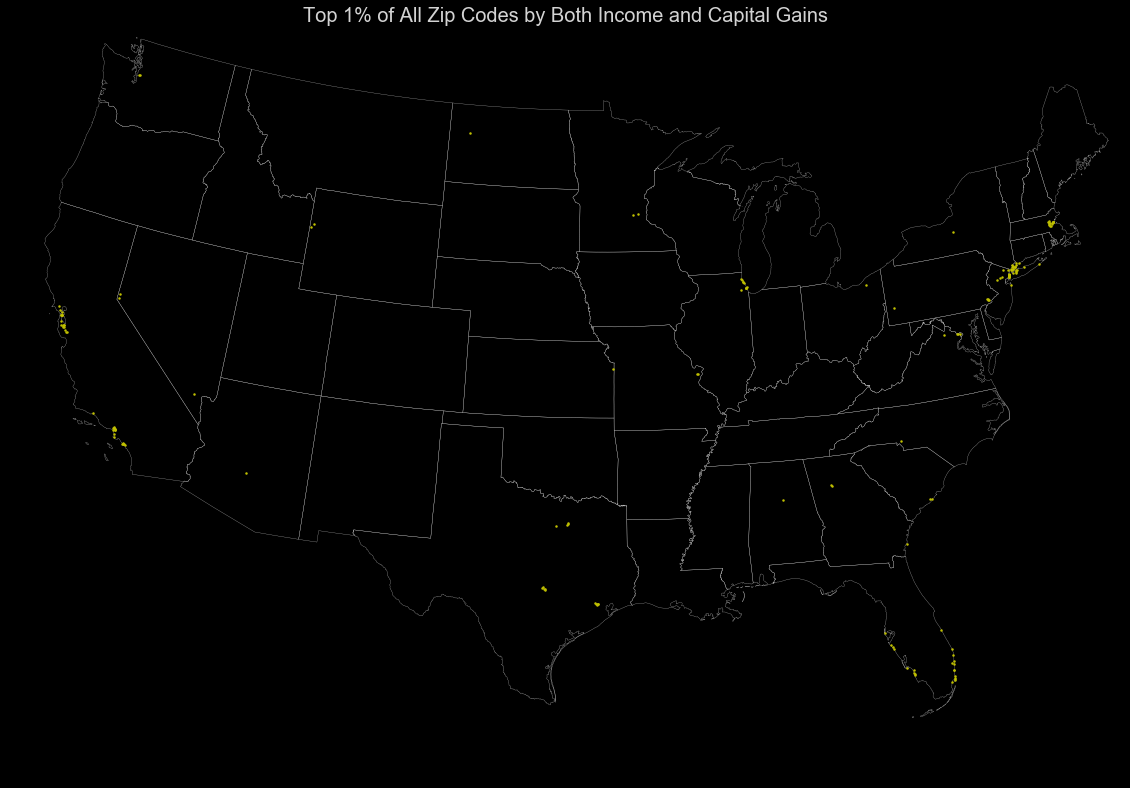

In [638]:
with plt.style.context('dark_background'):
    fig = plt.figure(figsize=(20, 20))
    m = Basemap(llcrnrlon=-119, llcrnrlat=20, urcrnrlon=-64, urcrnrlat=49,
                projection='lcc', lat_1=33, lat_2=45, lon_0=-95)

    m.readshapefile('shapefiles/st99_d00', name='states', color='lightgray', drawbounds=True, linewidth=.25);
    
    lats = top_both_lat_lng['lat']
    lons = top_both_lat_lng['lng']
    
    for lat, lon in zip(lats, lons):
        x, y = m(lon, lat)
        m.plot(x, y, '.y', markersize=5)
        
    plt.annotate('Top 1% of All Zip Codes by Both Income and Capital Gains', color='lightgray', xy=(.5, 1), ha='center', xycoords='axes fraction', fontsize=20)

In [559]:
zip_code_with_ltln = pd.merge(income_by_zipcode, zip_codes, left_index=True, right_on='zipcode')

# top by income

# top by capital gains

# bottom by income

# bottom by capital gains

In [552]:
zip_code_with_ltln.head()

,num_with_income,total_income_amount,num_with_capital_gains,total_capital_gains,avg_income,avg_capital_gains,zipcode,lat,lng
142,8950.0,504774.0,1260.0,6717.0,56399,5330.952381,1001,42.062368,-72.625754
143,9670.0,796475.0,2950.0,57274.0,82365,19414.915254,1002,42.364060,-72.458741
145,2300.0,138309.0,330.0,2124.0,60134,6436.363636,1005,42.418848,-72.106598
146,7490.0,537509.0,1300.0,10447.0,71763,8036.153846,1007,42.279010,-72.400468
147,620.0,40213.0,90.0,328.0,64859,3644.444444,1008,42.190191,-72.954263


In [556]:
zip_codes[zip_codes['zipcode'] == 1001]

,zipcode,lat,lng
142,1001,42.062368,-72.625754


In [645]:
top_income = zip_code_with_ltln.sort_values('avg_income', ascending=False).iloc[:one_perc_count]
top_income.head()

,num_with_income,total_income_amount,num_with_capital_gains,total_capital_gains,avg_income,avg_capital_gains,zipcode,lat,lng
10729,220.0,561790.0,160.0,186977.0,2553590,1.168606e+06,33109,25.756717,-80.140066
30965,3250.0,4904269.0,2340.0,2046659.0,1509005,8.746406e+05,94027,37.453514,-122.204756
10867,5490.0,6938322.0,3680.0,3577217.0,1263810,9.720698e+05,33480,26.684952,-80.037235
31015,8760.0,10344979.0,5300.0,4326312.0,1180933,8.162853e+05,94301,37.444131,-122.149917
30989,1310.0,1301904.0,560.0,404880.0,993819,7.230000e+05,94104,37.791412,-122.402129


In [604]:
bottom_income = zip_code_with_ltln.sort_values('avg_income').iloc[:one_perc_count]
bottom_income.head()

,num_with_income,total_income_amount,num_with_capital_gains,total_capital_gains,avg_income,avg_capital_gains,zipcode,lat,lng
15502,210.0,1616.0,0.0,0.0,7695,NaN,47406,39.177797,-86.515448
22273,150.0,2062.0,0.0,0.0,13746,NaN,64147,38.851782,-94.554647
28878,420.0,6180.0,50.0,69.0,14714,1380.0,84112,40.765076,-111.841478
19683,110.0,1923.0,0.0,0.0,17481,NaN,57794,43.124034,-102.394843
12362,2260.0,41860.0,0.0,0.0,18522,NaN,38126,35.126968,-90.043659


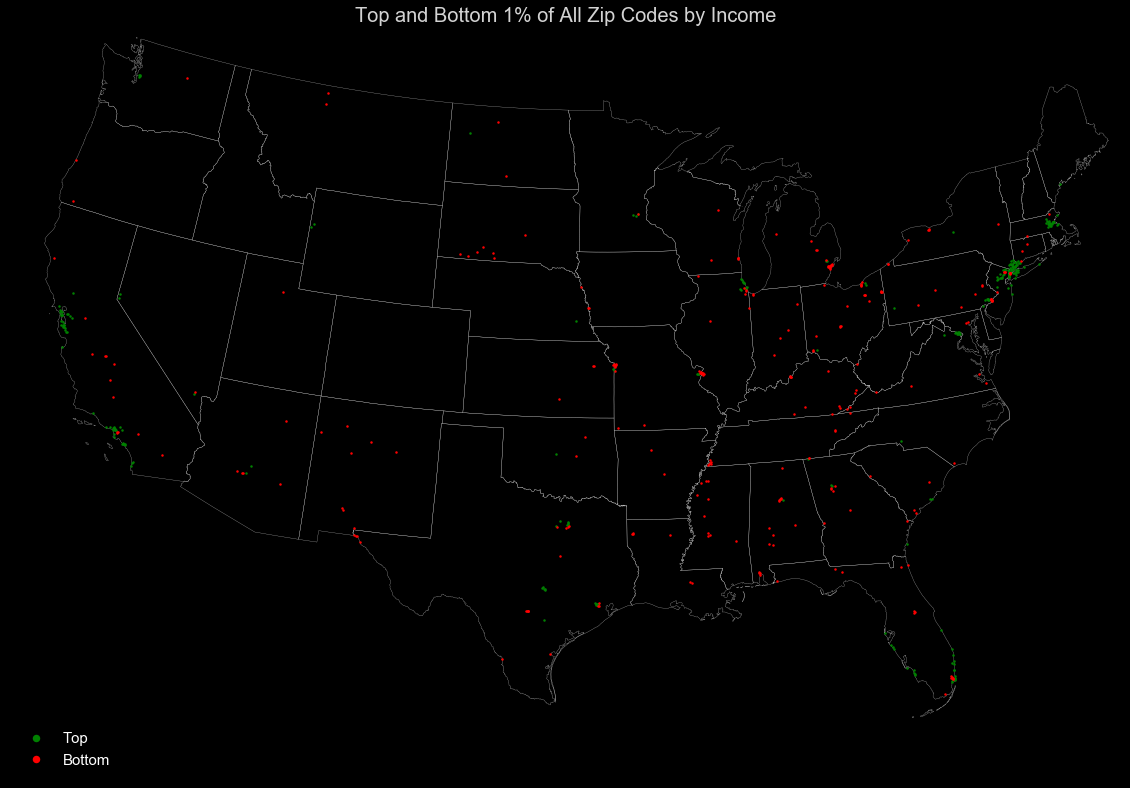

In [672]:
with plt.style.context('dark_background'):
    fig = plt.figure(figsize=(20, 20))
    m = Basemap(llcrnrlon=-119, llcrnrlat=20, urcrnrlon=-64, urcrnrlat=49,
                projection='lcc', lat_1=33, lat_2=45, lon_0=-95)

    m.readshapefile('shapefiles/st99_d00', name='states', color='lightgray', drawbounds=True, linewidth=.25);
    
    lats = top_income['lat']
    lons = top_income['lng']
    
    label = 'Top'
    for lat, lon in zip(lats, lons):
        x, y = m(lon, lat)
        m.plot(x, y, '.g', markersize=5, label=label)
        label=None
        
    lats = bottom_income['lat']
    lons = bottom_income['lng']
    
    label = 'Bottom'
    for lat, lon in zip(lats, lons):
        x, y = m(lon, lat)
        m.plot(x, y, '.r', markersize=5, label=label)
        label = None
        
    plt.annotate('Top and Bottom 1% of All Zip Codes by Income', color='lightgray', xy=(.5, 1), ha='center', xycoords='axes fraction', fontsize=20)
    plt.legend(loc='lower left', fontsize=15, markerscale=3)

In [644]:
top_10_income = zip_code_with_ltln.sort_values('avg_income', ascending=False).iloc[:10]
bottom_10_income = top_income = zip_code_with_ltln.sort_values('avg_income').iloc[:10]

In [649]:
top_10_income

,num_with_income,total_income_amount,num_with_capital_gains,total_capital_gains,avg_income,avg_capital_gains,zipcode,lat,lng
10729,220.0,561790.0,160.0,186977.0,2553590,1.168606e+06,33109,25.756717,-80.140066
30965,3250.0,4904269.0,2340.0,2046659.0,1509005,8.746406e+05,94027,37.453514,-122.204756
10867,5490.0,6938322.0,3680.0,3577217.0,1263810,9.720698e+05,33480,26.684952,-80.037235
31015,8760.0,10344979.0,5300.0,4326312.0,1180933,8.162853e+05,94301,37.444131,-122.149917
30989,1310.0,1301904.0,560.0,404880.0,993819,7.230000e+05,94104,37.791412,-122.402129
2723,1610.0,1585609.0,980.0,373087.0,984850,3.807010e+05,10577,41.038367,-73.711114
5955,2020.0,1951274.0,1390.0,249193.0,965977,1.792755e+05,19035,40.051349,-75.277642
30078,3280.0,3007211.0,2020.0,743083.0,916832,3.678629e+05,90067,34.057597,-118.413998
20455,1220.0,1061793.0,850.0,202511.0,870322,2.382482e+05,60043,42.088859,-87.714588
579,5140.0,4467755.0,3410.0,1752109.0,869213,5.138150e+05,2493,42.360502,-71.303433


In [617]:
bottom_10_income.head()

,num_with_income,total_income_amount,num_with_capital_gains,total_capital_gains,avg_income,avg_capital_gains,zipcode,lat,lng
15502,210.0,1616.0,0.0,0.0,7695,NaN,47406,39.177797,-86.515448
22273,150.0,2062.0,0.0,0.0,13746,NaN,64147,38.851782,-94.554647
28878,420.0,6180.0,50.0,69.0,14714,1380.0,84112,40.765076,-111.841478
19683,110.0,1923.0,0.0,0.0,17481,NaN,57794,43.124034,-102.394843
12362,2260.0,41860.0,0.0,0.0,18522,NaN,38126,35.126968,-90.043659


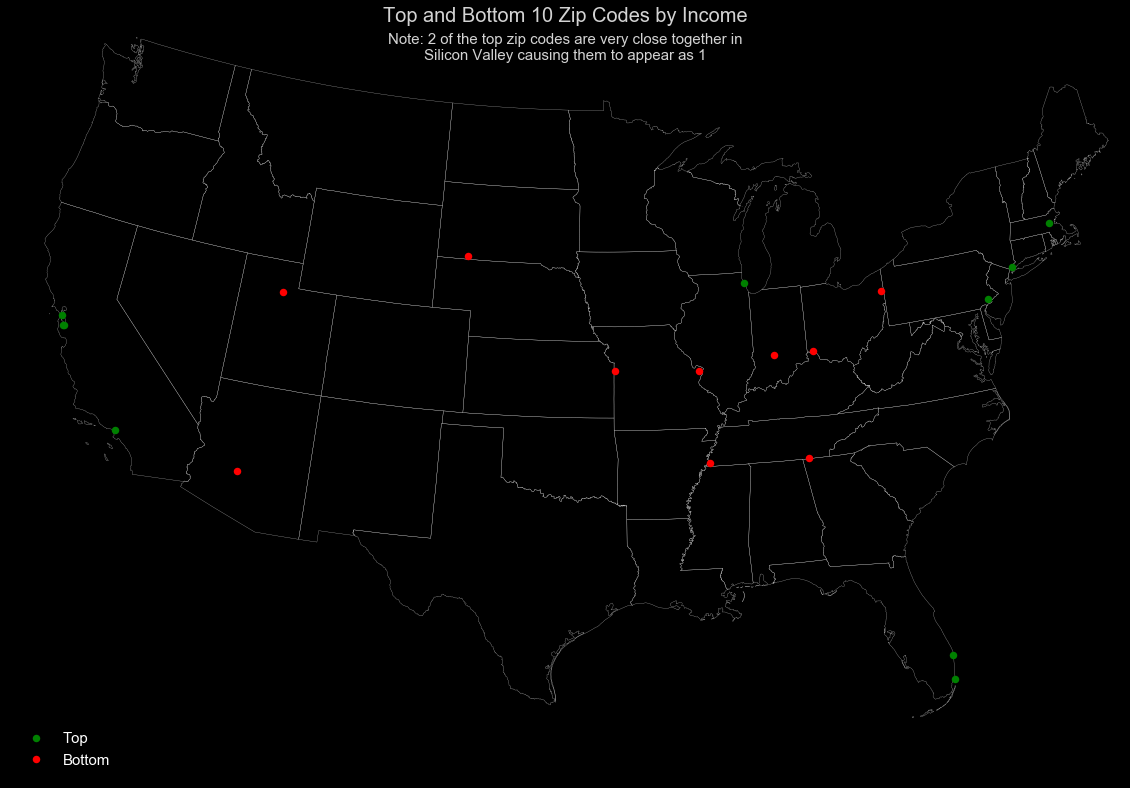

In [736]:
with plt.style.context('dark_background'):
    fig = plt.figure(figsize=(20, 20))
    m = Basemap(llcrnrlon=-119, llcrnrlat=20, urcrnrlon=-64, urcrnrlat=49,
                projection='lcc', lat_1=33, lat_2=45, lon_0=-95)

    m.readshapefile('shapefiles/st99_d00', name='states', color='lightgray', drawbounds=True, linewidth=.25);
    
    lats = top_10_income['lat']
    lons = top_10_income['lng']
    
    markersize = 15
    
    label = 'Top'
    for lat, lon in zip(lats, lons):
        x, y = m(lon, lat)
        m.plot(x, y, '.g', markersize=markersize, label=label)
        label=None
        
    lats = bottom_10_income['lat']
    lons = bottom_10_income['lng']
    
    label='Bottom'
    for lat, lon in zip(lats, lons):
        x, y = m(lon, lat)
        m.plot(x, y, '.r', markersize=markersize, label=label)
        label=None
        
    plt.legend(fontsize=15, loc='lower left')
    plt.annotate('Top and Bottom 10 Zip Codes by Income', color='lightgray', xy=(.5, 1), ha='center', xycoords='axes fraction', fontsize=20)
    plt.annotate('Note: 2 of the top zip codes are very close together in\nSilicon Valley causing them to appear as 1', color='lightgray', xy=(.5, .95), ha='center', xycoords='axes fraction', fontsize=15)


In [677]:
zip_code_with_ltln.head()

,num_with_income,total_income_amount,num_with_capital_gains,total_capital_gains,avg_income,avg_capital_gains,zipcode,lat,lng
142,8950.0,504774.0,1260.0,6717.0,56399,5330.952381,1001,42.062368,-72.625754
143,9670.0,796475.0,2950.0,57274.0,82365,19414.915254,1002,42.364060,-72.458741
145,2300.0,138309.0,330.0,2124.0,60134,6436.363636,1005,42.418848,-72.106598
146,7490.0,537509.0,1300.0,10447.0,71763,8036.153846,1007,42.279010,-72.400468
147,620.0,40213.0,90.0,328.0,64859,3644.444444,1008,42.190191,-72.954263


In [683]:
new_df = zip_code_with_ltln.sort_values(['avg_income'])[['avg_income']]
new_df.head()

,avg_income
15502,7695
22273,13746
28878,14714
19683,17481
12362,18522


In [695]:
new_df = new_df.reset_index(drop=True)

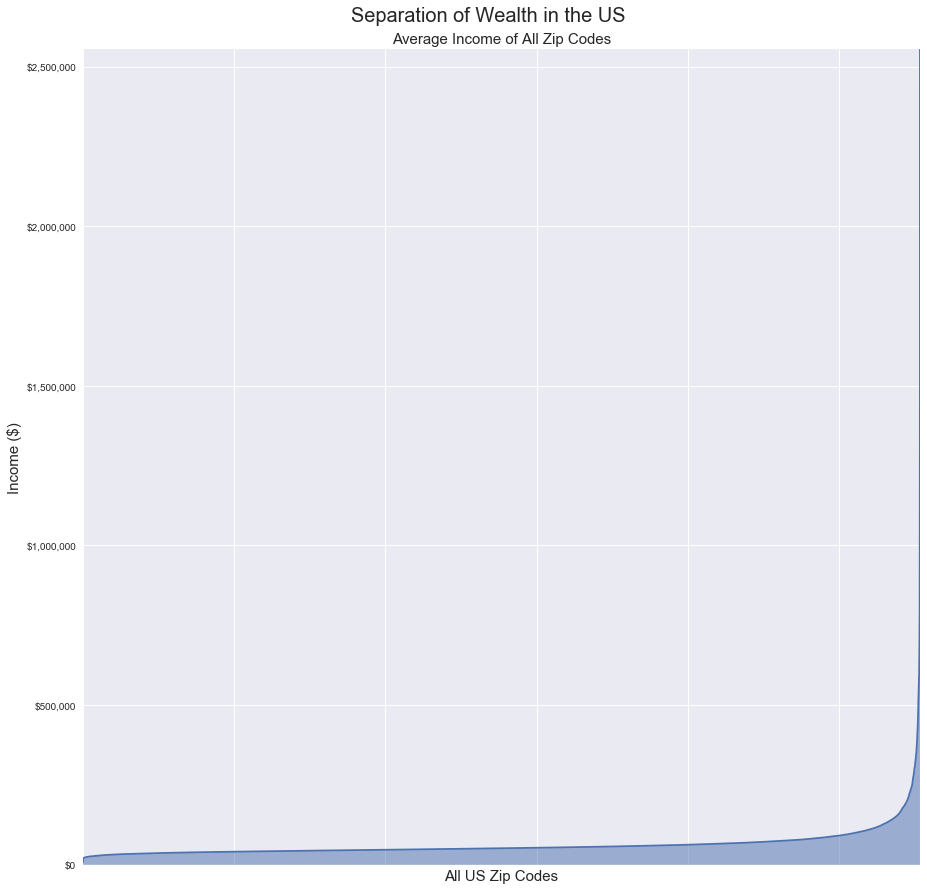

In [728]:
fig = plt.figure(figsize=(15, 15))
ax = plt.axes()
ax.margins(0)

ax.plot(new_df);
ax.fill_between(new_df.index, 0, new_df['avg_income'], alpha=.5);
ax.set_ylabel('Income ($)', fontsize=15);
ax.tick_params('x', labelbottom=False)
ax.set_xlabel('All US Zip Codes', fontsize=15);
fig.suptitle('Separation of Wealth in the US', fontsize=20, y=.92)
ax.set_title('Average Income of All Zip Codes', fontsize=15);
ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: '$' + format(int(x), ',')))